# Assignment 1 - Data Visualization

In [1]:
import numpy as np
import pandas as pd

### Question : The numbers of crime incidents for each type from 2008 - 2016

Get dataset

In [7]:
df_london = pd.read_csv('dataset/london_crime_by_lsoa.csv')

print('Data loaded...')

Data loaded...


In [8]:
df_london.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [29]:
df_london.set_index('major_category', inplace=True)

In [30]:
df_london

,lsoa_code,borough,minor_category,value,year,month
major_category,,,,,,
Burglary,E01001116,Croydon,Burglary in Other Buildings,0,2016,11
Violence Against the Person,E01001646,Greenwich,Other violence,0,2016,11
Violence Against the Person,E01000677,Bromley,Other violence,0,2015,5
Burglary,E01003774,Redbridge,Burglary in Other Buildings,0,2016,3
Robbery,E01004563,Wandsworth,Personal Property,0,2008,6
...,...,...,...,...,...,...
Criminal Damage,E01000504,Brent,Criminal Damage To Dwelling,0,2015,2
Robbery,E01002504,Hillingdon,Personal Property,1,2015,6
Burglary,E01004165,Sutton,Burglary in a Dwelling,0,2011,2


In [31]:
df_london_pivot = pd.pivot_table(df_london, values='value', index=['major_category'],
                    columns=['year'], aggfunc=np.sum)
df_london_pivot

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


In [32]:
# transform/transpose dataframe
df_london_tp = df_london_pivot.transpose()
df_london_tp

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


#### Line Plot

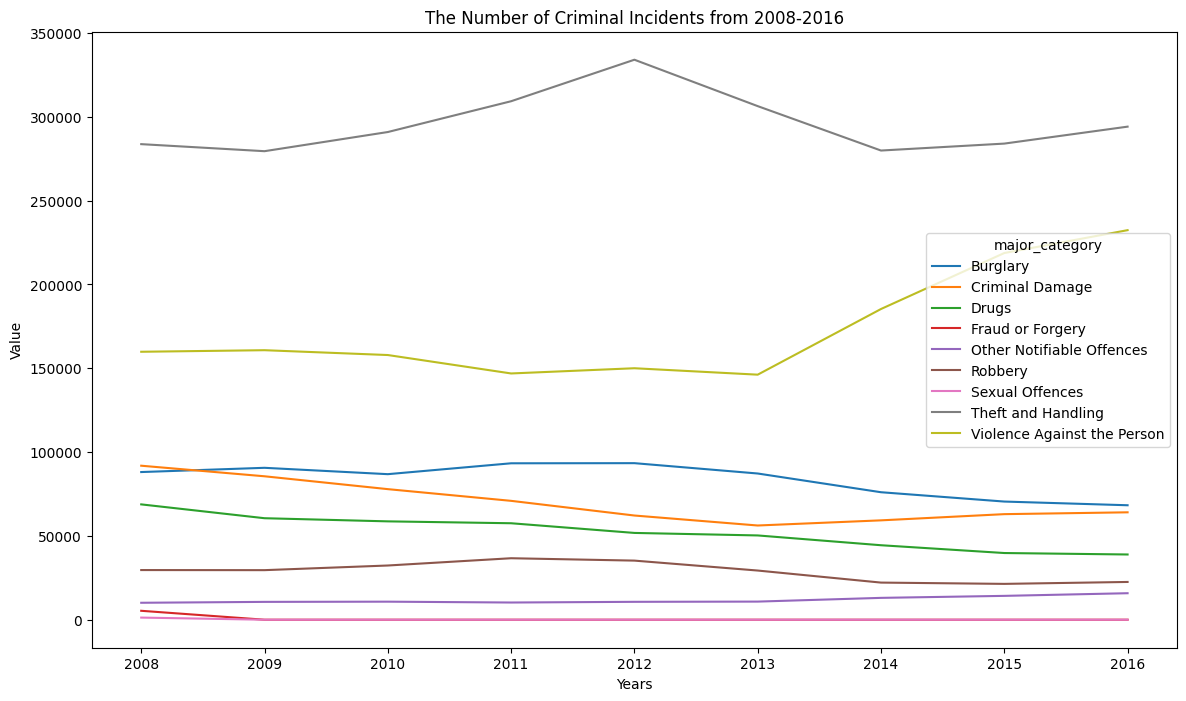

In [33]:
import matplotlib.pyplot as plt

df_london_tp.plot(kind='line', figsize=(14,8))
plt.title('The Number of Criminal Incidents from 2008-2016')
plt.ylabel('Value')
plt.xlabel('Years')

plt.show()

#### Analisis :
Berdasarkan grafik di atas dapat disimpulkan bahwa 
- Crime incidents yang banyak terjadi pada 2008 - 2016 adalah Theft and Handling
- Crime incidents yang paling jaang terjadi adalah sexual offence

### Question : Stacked area plot for the number of criminal incidents from 2008-2016 
#### Area Plot

Text(0.5, 0, 'Years')

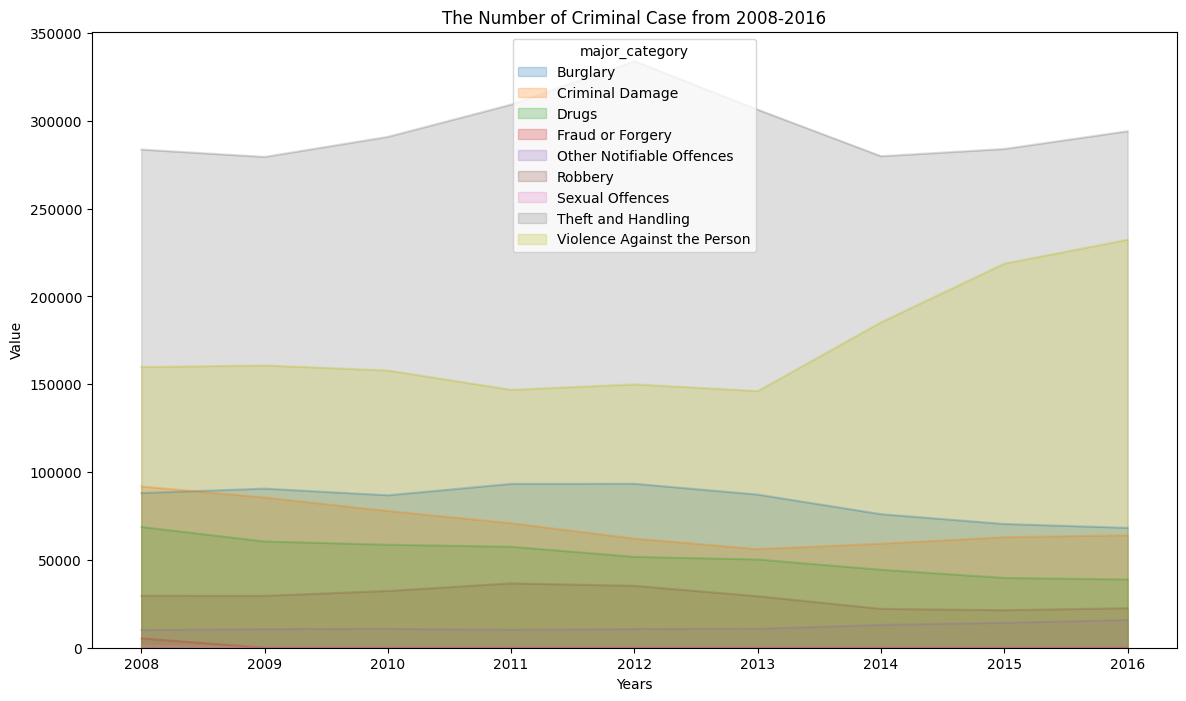

In [34]:
ax = df_london_tp.plot(kind='area',alpha=0.25, figsize=[14, 8], stacked=False)

ax.set_title('The Number of Criminal Case from 2008-2016')
plt.ylabel('Value')
plt.xlabel('Years')


#### Analisis :
Berdasarkan grafik di atas dapat disimpulkan bahwa 
- Crime incidents yang banyak terjadi pada 2008 - 2016 adalah Theft and Handling
- Crime incidents yang paling jaang terjadi adalah sexual offence

#### Histogram
Question : 

In [35]:
df_london_3 = df_london_tp.iloc[:, 0:3]
df_london_3

major_category,Burglary,Criminal Damage,Drugs
year,,,
2008,88092,91872,68804
2009,90619,85565,60549
2010,86826,77897,58674
2011,93315,70914,57550
2012,93392,62158,51776
2013,87222,56206,50278
2014,76053,59279,44435
2015,70489,62976,39785
2016,68285,64071,38914


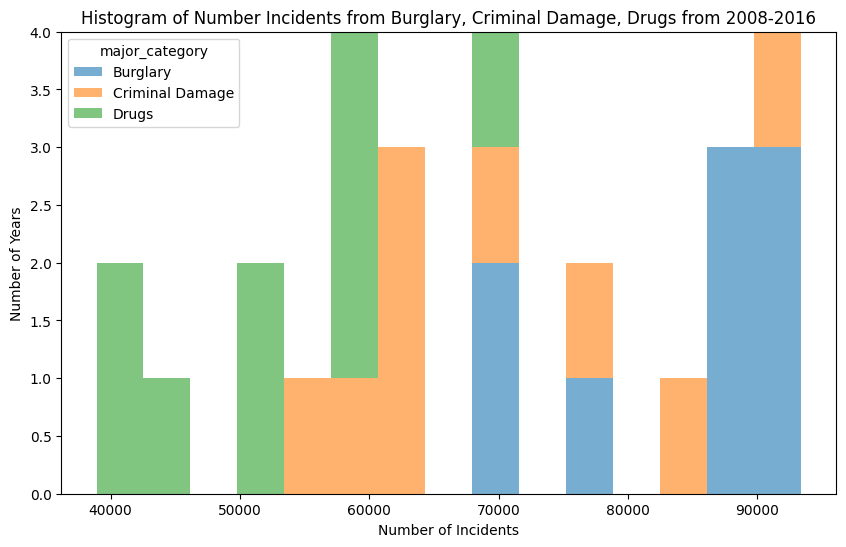

In [36]:
df_london_3.plot(kind='hist',
            figsize=(10,6),
            bins = 15,
            alpha = 0.6,
            stacked=True
            )

plt.title('Histogram of Number Incidents from Burglary, Criminal Damage, Drugs from 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Incidents')

plt.show()


#### Analisis :
Berdasarkan grafik di atas dapat disimpulkan bahwa 
- Dari tiga jenis major crime tersebut Burglary adalah crime incidents yang paling banyak terjadi 

### Question : The number of robbery incidents from 2008-2012
#### Bar Chart

In [37]:
# step 1 : get the data
df_robbery = df_london_pivot.loc['Robbery']
df_robbery.head()

year
2008    29627
2009    29568
2010    32341
2011    36679
2012    35260
Name: Robbery, dtype: int64

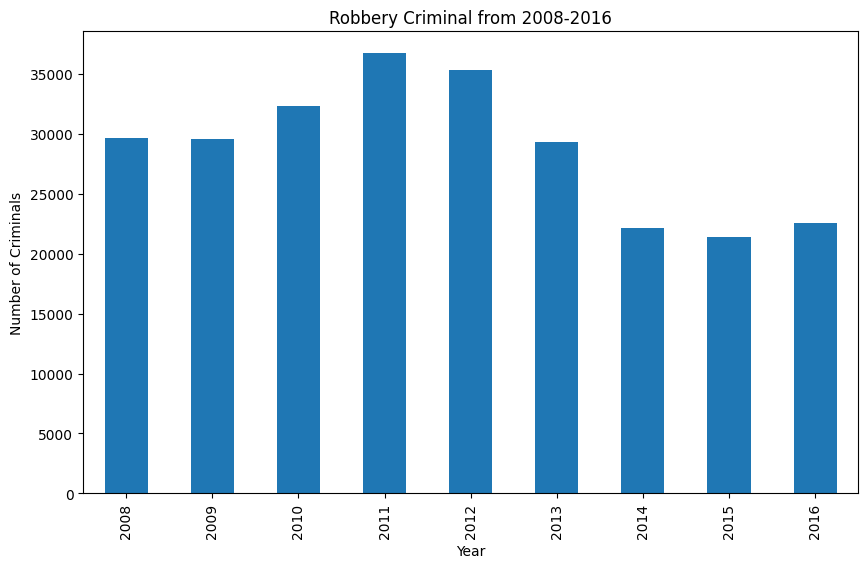

In [38]:
# step 2 : plot data
df_robbery.plot(kind='bar', figsize=(10,6))

plt.xlabel('Year') # add to x label to the plot
plt.ylabel('Number of Criminals')
plt.title('Robbery Criminal from 2008-2016') 

plt.show()

#### Analisis :
Berdasarkan grafik di atas dapat disimpulkan bahwa 
- Robbery criminal banyak terjadi pada tahun 2011
- Robbery criminal banyak terjadi pada tahun 2015

### Question : Persentage of each criminal major category from 2008 - 1016
#### Pie Chart

In [39]:
df_london_total = df_london.groupby('major_category').sum()
df_london_total

,value,year,month
major_category,,,
Burglary,754293,2099731248,6783426
Criminal Damage,630938,4163174064,13449618
Drugs,470765,2373089616,7666542
Fraud or Forgery,5325,475878240,1537380
Other Notifiable Offences,106349,1561923648,5045976
Robbery,258873,1890040608,6105996
Sexual Offences,1273,217513296,702702
Theft and Handling,2661861,7980195600,25780950
Violence Against the Person,1558081,6381548928,20616336


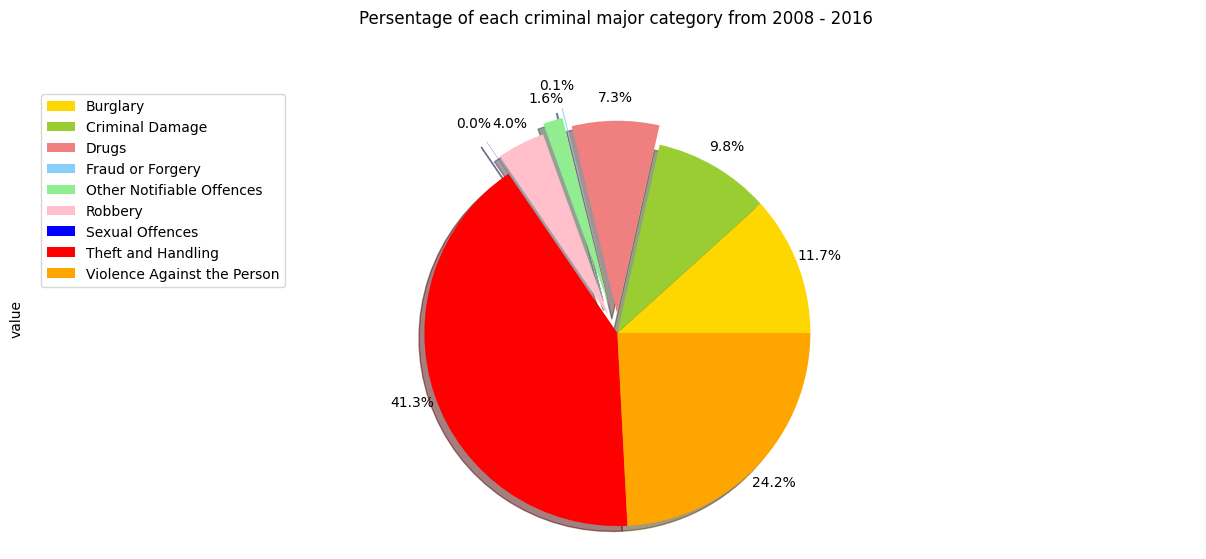

In [40]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'blue', 'red', 'orange']

explode_list = [0, 0, 0.1, 0.2, 0.15, 0.1, 0.2, 0, 0] # ratio for each continent with which to offset each wedge

df_london_total['value'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct = '%1.1f%%',
                            startangle=0,
                            shadow=True,
                            labels=None,        # turn off labels on pie chart
                            pctdistance=1.12,   ## the ratio between the center of each pie slice and the start of the text generated by autopct
                            colors=color_list,      ## add custom colors
                            explode = explode_list, ## 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Persentage of each criminal major category from 2008 - 2016', y=1.12)

plt.axis('equal')

## add legend
plt.legend(labels = df_london_total.index, loc='upper left')

plt.show()

#### Analisis :
Berdasarkan diagram di atas dapat disimpulkan bahwa 
- Crime incidents yang banyak terjadi pada 2008 - 2016 adalah Theft and Handling
- Crime incidents yang paling jaang terjadi adalah sexual offence

### Question :
#### Box Plot

In [41]:
df_CDB = df_london_tp.iloc[:5,:2]
df_CDB

major_category,Burglary,Criminal Damage
year,,
2008,88092,91872
2009,90619,85565
2010,86826,77897
2011,93315,70914
2012,93392,62158


In [42]:
# melihat percentages associated
df_CDB.describe()

major_category,Burglary,Criminal Damage
count,5.000000,5.000000
mean,90448.800000,77681.200000
std,2982.686826,11729.710256
min,86826.000000,62158.000000
25%,88092.000000,70914.000000
50%,90619.000000,77897.000000
75%,93315.000000,85565.000000
max,93392.000000,91872.000000


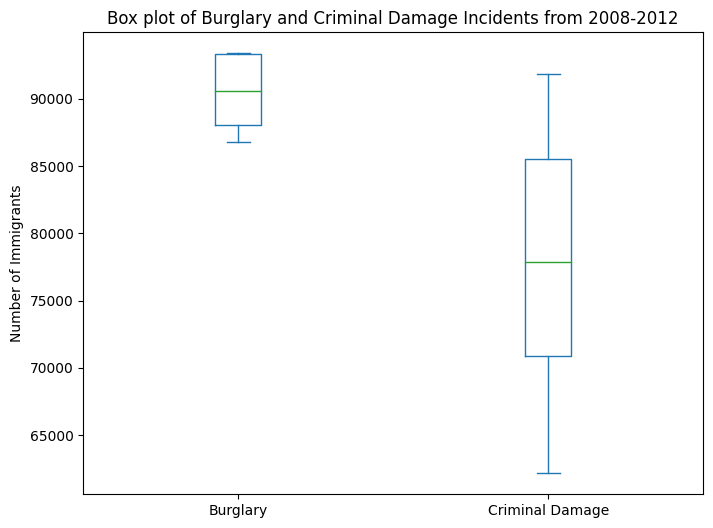

In [43]:
df_CDB.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Burglary and Criminal Damage Incidents from 2008-2012')
plt.ylabel('Number of Immigrants')

plt.show()

#### Analisis :
Berdasarkan grafik di atas dapat disimpulkan bahwa 
- Diantara dua crime incidents di atas, burglary memiliki nilai rata-rata kejadian yang lebih banyak yaitu di atas 90000 
- Dalam rentang waktu 2008-2012, terdapat tahun dimana criminal damage incidents terjadi di bawah 65000

### Question : Relation between total criminals with year
#### Scatter Plot

Text(0, 0.5, 'Number of Crime')

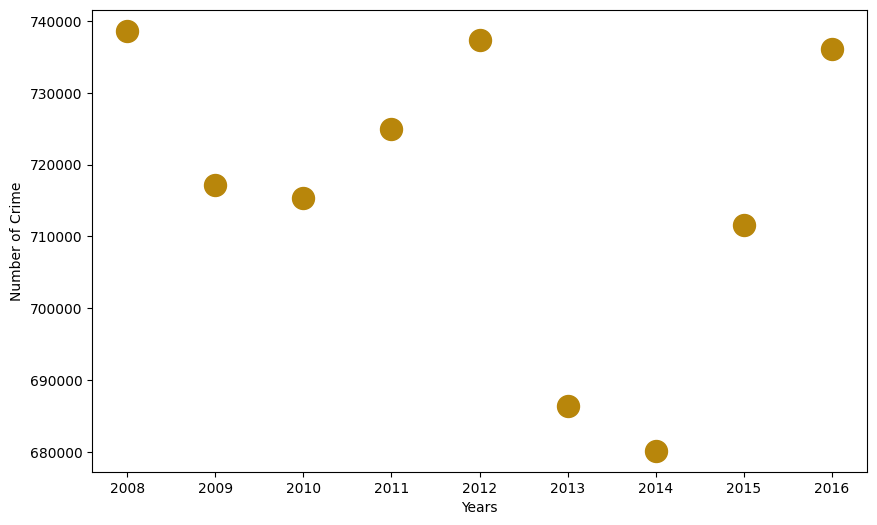

In [44]:
years = df_london['year'].unique()

years.sort()

sum_year=df_london.groupby(['year']).sum()

Values=sum_year['value'].to_numpy()
name_of_year=["2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016"]


    
plt.figure(figsize=(10,6))
ax = plt.axes()
plt.scatter(name_of_year,Values,s=250,color='darkgoldenrod',cmap='viridis',alpha=1)
plt.xlabel('Years')
plt.ylabel('Number of Crime')


#### Analisis :
Berdasarkan plot di atas dapat disimpulkan bahwa 
- Tidak ada korelasi yang signifikan antara tahun dan angka criminal incidents yang terjadi

#### Word Clouds 

In [45]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')
df_london_2000 = df.iloc[:2000]

In [46]:
df_london_2000['minor_category'].unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

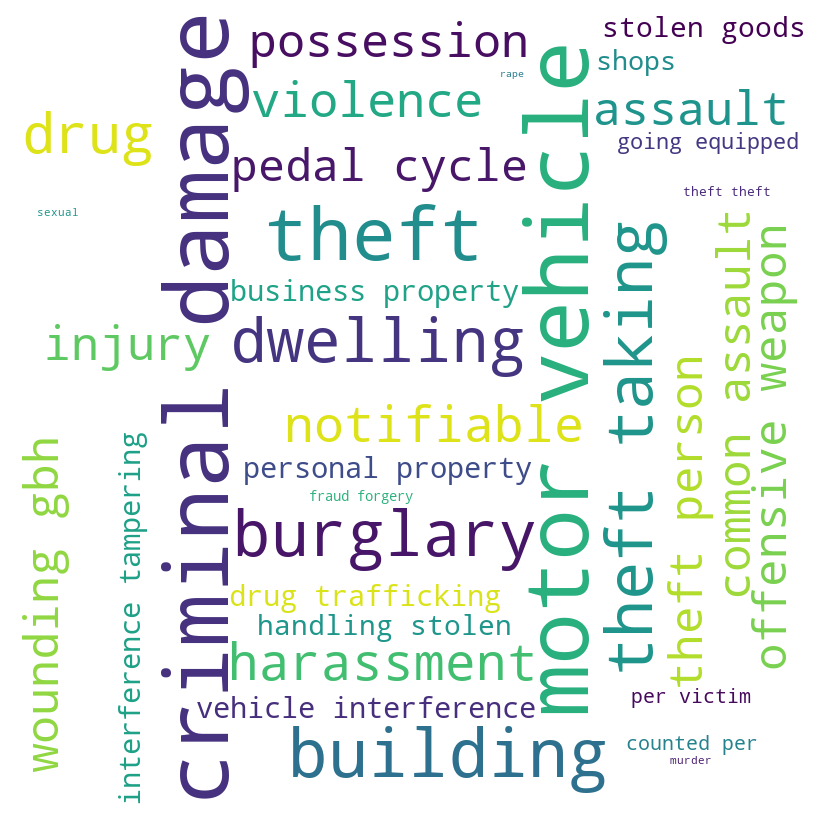

In [47]:
# importing all necessary modules
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
 
# iterate through the csv file
for val in df_london_2000.minor_category :
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad =0)

plt.show()

#### Analisis :
Berdasarkan plot di atas dapat disimpulkan bahwa 
- Criminal damage adalah kata yang paling sering muncul

#### Folium

In [48]:
df_london

,lsoa_code,borough,minor_category,value,year,month
major_category,,,,,,
Burglary,E01001116,Croydon,Burglary in Other Buildings,0,2016,11
Violence Against the Person,E01001646,Greenwich,Other violence,0,2016,11
Violence Against the Person,E01000677,Bromley,Other violence,0,2015,5
Burglary,E01003774,Redbridge,Burglary in Other Buildings,0,2016,3
Robbery,E01004563,Wandsworth,Personal Property,0,2008,6
...,...,...,...,...,...,...
Criminal Damage,E01000504,Brent,Criminal Damage To Dwelling,0,2015,2
Robbery,E01002504,Hillingdon,Personal Property,1,2015,6
Burglary,E01004165,Sutton,Burglary in a Dwelling,0,2011,2


In [49]:
# download countries geojson file
import json
import folium
from urllib import request

url =  "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json"

response = request.urlopen(url)

data = json.loads(response.read())

print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [50]:
world_geo = data

#create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='OpenStreetMap')


world_map.choropleth(
    geo_data = world_geo,
    data=df_london,
    columns = ['borough', 'value'],
    key_on = 'feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name='Criminal Incidents in London'
)

world_map

c:\Users\Kirei\AppData\Local\Programs\Python\Python310\lib\site-packages\folium\folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
